In [106]:
# imports

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.CMS])
import seaborn as sns
import awkward as ak

In [107]:
f = uproot.open("data.nosync/4jQCDbackground_autoBoost_10000000Events.root")
events = f["Events_4j"]

In [141]:
class jetEvent:

    def __init__(self, pt = [], eta = [], Phi = []):
        self.pt = pt
        self.eta = eta
        self.Phi = Phi
        return
    
    def coord_tfm(self):
        self.Theta = 2 * np.arctan(np.exp(self.eta))
        self.E = self.pt / np.sin(self.Theta)
        self.Px = self.pt * np.cos(self.Phi)
        self.Py = self.pt * np.sin(self.Phi)
        self.Pz = self.E * np.cos(self.Theta)
        return
    

class dijet:
    def __init__(self, jet1 = None, jet2 = None):
        self.Px = jet1.Px + jet2.Px
        self.Py = jet1.Py + jet2.Py
        self.Pz = jet1.Pz + jet2.Pz
        self.E = jet1.E + jet2.E
        self.dTheta = jet1.Theta - jet2.Theta
        self.dPhi =  jet1.Phi - jet2.Phi

    def invariant_mass(self):
        return 1e3 * (self.E**2 - self.Px**2 - self.Py**2 - self.Pz**2)**0.5 # 1e3 factor to get GeV
    


In [142]:
j1 = jetEvent(pt = events["j1"]["pt"].array(), eta = events["j1"]["eta"].array(), Phi = events["j1"]["phi"].array())
j2 = jetEvent(pt = events["j2"]["pt"].array(), eta = events["j2"]["eta"].array(), Phi = events["j2"]["phi"].array())
j3 = jetEvent(pt = events["j3"]["pt"].array(), eta = events["j3"]["eta"].array(), Phi = events["j3"]["phi"].array())
j4 = jetEvent(pt = events["j4"]["pt"].array(), eta = events["j4"]["eta"].array(), Phi = events["j4"]["phi"].array())

for j in (j1, j2, j3, j4): # obtaining also 3-momenta
    j.coord_tfm()

In [144]:
# j12
j12 = dijet(j1, j2)

# j13
j13 = dijet(j1, j3)

# j14
j14 = dijet(j1, j4)

# j23
j23 = dijet(j2, j3)

# j24
j24 = dijet(j2, j4)

# j34
j34 = dijet(j3, j4)

dijets_list = [j12, j13, j14, j23, j24, j34] # to optimize computations
dijets_names = ["j12", "j13", "j14", "j23", "j24", "j34"]

In [147]:
df = pd.DataFrame({'j12_m':j12.invariant_mass(), 'j34_m':j34.invariant_mass(), 'j13_m':j13.invariant_mass(), 'j24_m':j24.invariant_mass(), 'j14_m':j14.invariant_mass(), 'j23_m':j23.invariant_mass()})

In [148]:
for dijet, name in zip(dijets_list, dijets_names):
    df["%s_dTheta" % name] = dijet.dTheta

df["j34_m + j24_m + j23_m"] = j34.invariant_mass() + j24.invariant_mass() + j23.invariant_mass()
df["j12_m + j13_m + j23_m"] = j12.invariant_mass() + j13.invariant_mass() + j14.invariant_mass()

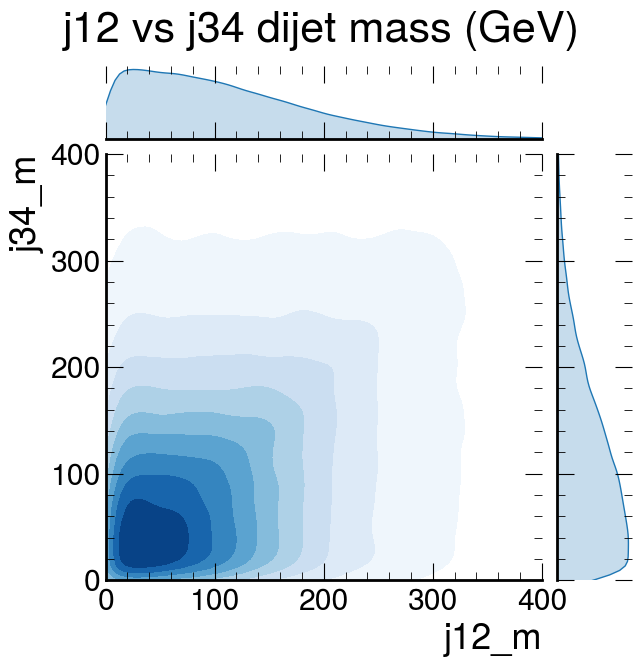

In [150]:
g = sns.jointplot(data = df, x = "j12_m", y = "j34_m", kind = "kde", cmap="Blues", fill=True, height = 7, xlim = (0, 400), ylim = (0, 400))
g.fig.suptitle("j12 vs j34 dijet mass (GeV)")
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room

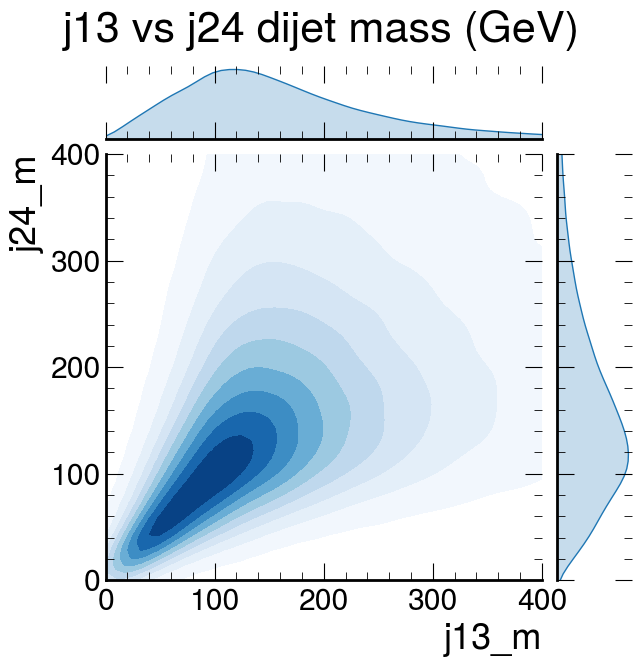

In [151]:
g = sns.jointplot(data = df, x = "j13_m", y = "j24_m", kind = "kde", cmap="Blues", fill=True, height = 7, xlim = (0, 400), ylim = (0, 400))
g.fig.suptitle("j13 vs j24 dijet mass (GeV)")
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room

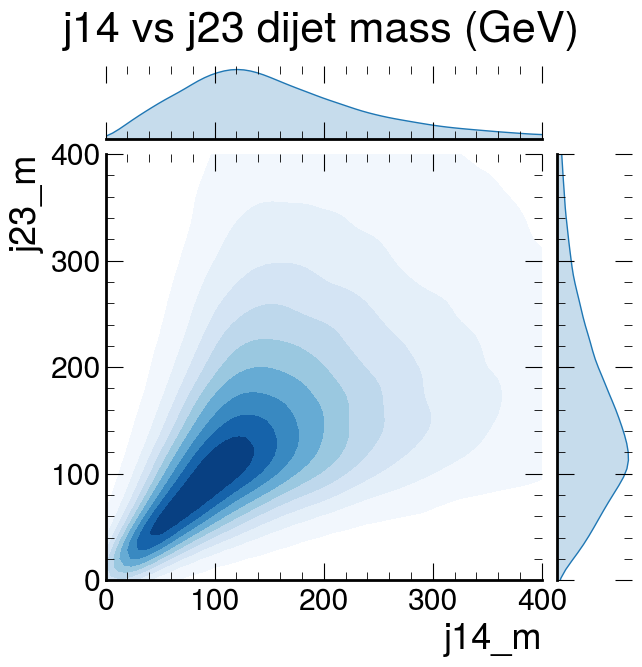

In [152]:
g = sns.jointplot(data = df, x = "j14_m", y = "j23_m", kind = "kde", cmap="Blues", fill=True, height = 7, xlim = (0, 400), ylim = (0, 400))
g.fig.suptitle("j14 vs j23 dijet mass (GeV)")
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room

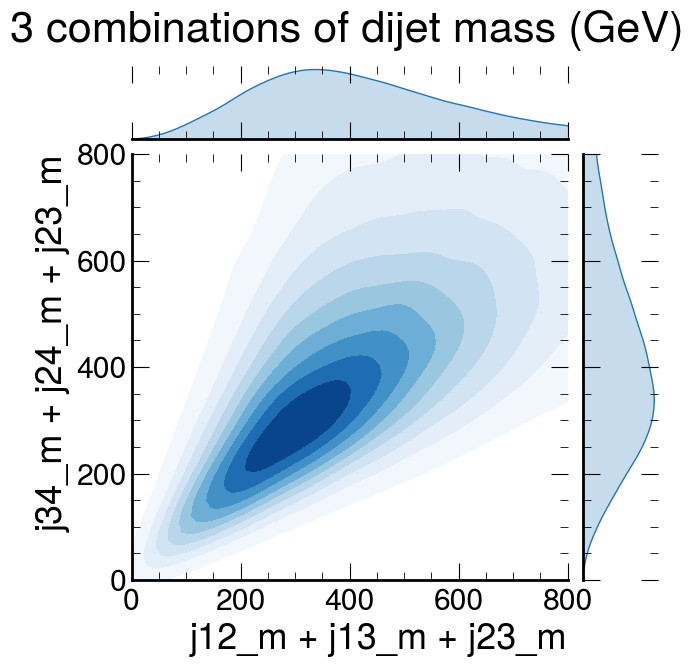

In [153]:
g = sns.jointplot(data = df, x = "j12_m + j13_m + j23_m", y = "j34_m + j24_m + j23_m", kind = "kde", cmap="Blues", fill=True, height = 7, xlim = (0, 800), ylim = (0, 800))
g.fig.suptitle("3 combinations of dijet mass (GeV)")
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room

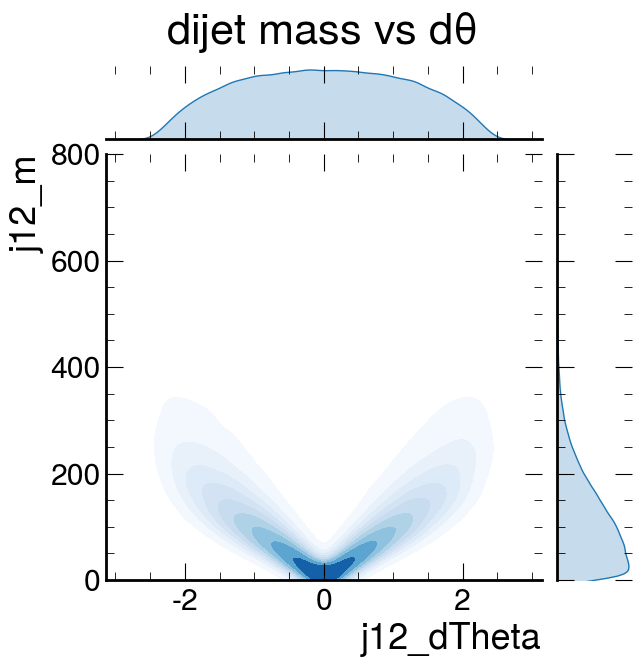

In [160]:
g = sns.jointplot(data = df, x = "j12_dTheta", y = "j12_m", kind = "kde", cmap="Blues", fill=True, height = 7, xlim = (-np.pi, np.pi), ylim = (0, 800))
g.fig.suptitle("dijet mass vs d$\\theta$")
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room

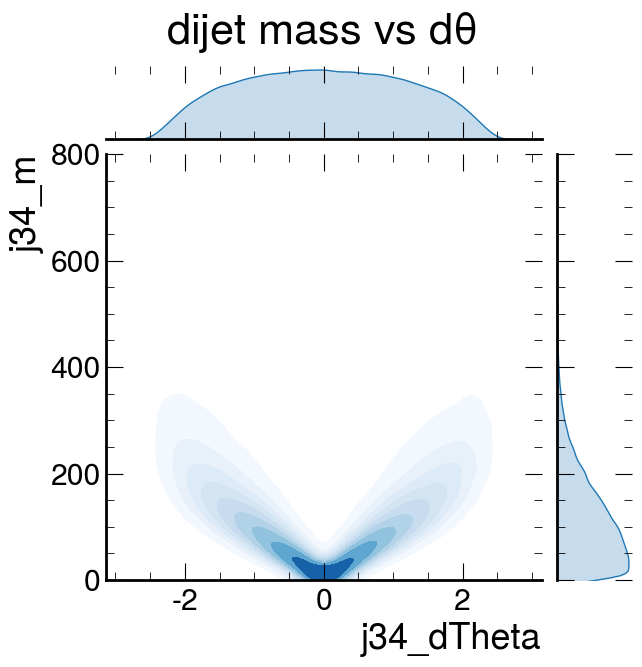

In [161]:
g = sns.jointplot(data = df, x = "j34_dTheta", y = "j34_m", kind = "kde", cmap="Blues", fill=True, height = 7, xlim = (-np.pi, np.pi), ylim = (0, 800))
g.fig.suptitle("dijet mass vs d$\\theta$")
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room

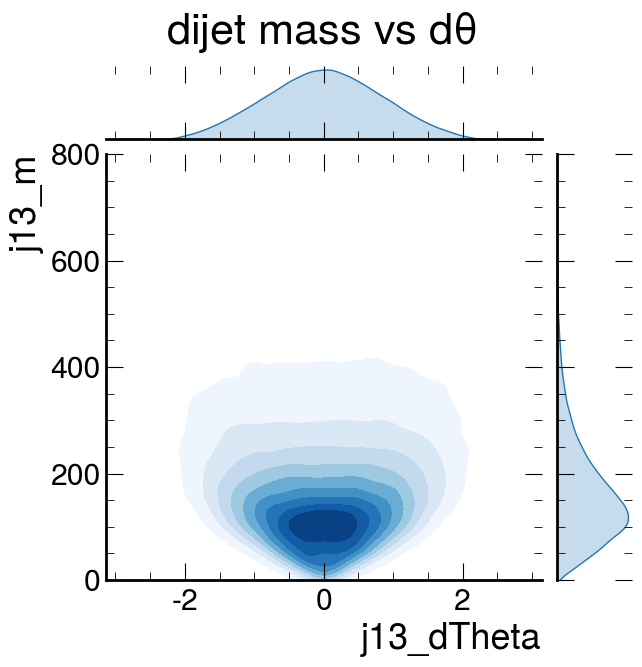

In [162]:
g = sns.jointplot(data = df, x = "j13_dTheta", y = "j13_m", kind = "kde", cmap="Blues", fill=True, height = 7, xlim = (-np.pi, np.pi), ylim = (0, 800))
g.fig.suptitle("dijet mass vs d$\\theta$")
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room

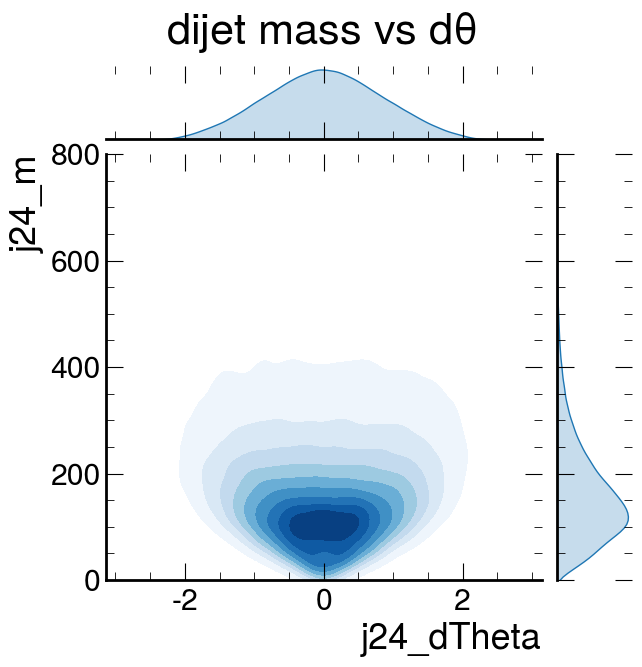

In [163]:
g = sns.jointplot(data = df, x = "j24_dTheta", y = "j24_m", kind = "kde", cmap="Blues", fill=True, height = 7, xlim = (-np.pi, np.pi), ylim = (0, 800))
g.fig.suptitle("dijet mass vs d$\\theta$")
g.fig.subplots_adjust(top=0.9) # Reduce plot to make room